# Data Analysis on Chicago Crime Data

Name: Peter Li
<br>
CNetID: jizhao

Above all, import all necessary packages

In [1]:
!pip install census

In [2]:
!pip install us

In [3]:
import pandas as pd

In [4]:
from census import Census
from us import states

In [5]:
import statsmodels.api as sm

In [6]:
from datetime import datetime

In [7]:
from matplotlib import pyplot as plt

## Problem 1: Data Acquisition and Analysis

Convert crime data in 2017 and 2018 to pandas dataframe

In [8]:
crime_17 = pd.read_csv('Crimes_-_2017.csv')

In [9]:
crime_18 = pd.read_csv('Crimes_-_2018.csv')

In [10]:
crime_17['Primary Type'] = crime_17['Primary Type'].astype('category')

In [11]:
crime_18['Primary Type'] = crime_18['Primary Type'].astype('category')

Find the number of each crime type in 2017

In [12]:
crime_17_type_count = crime_17['Primary Type'].value_counts()

In [13]:
crime_17_type_count

THEFT                                64346
BATTERY                              49214
CRIMINAL DAMAGE                      29042
ASSAULT                              19303
DECEPTIVE PRACTICE                   19028
OTHER OFFENSE                        17227
BURGLARY                             13001
ROBBERY                              11877
NARCOTICS                            11658
MOTOR VEHICLE THEFT                  11406
CRIMINAL TRESPASS                     6812
WEAPONS VIOLATION                     4686
OFFENSE INVOLVING CHILDREN            2269
CRIM SEXUAL ASSAULT                   1628
PUBLIC PEACE VIOLATION                1498
INTERFERENCE WITH PUBLIC OFFICER      1086
SEX OFFENSE                           1025
PROSTITUTION                           735
HOMICIDE                               676
ARSON                                  444
GAMBLING                               191
LIQUOR LAW VIOLATION                   191
KIDNAPPING                             190
STALKING   

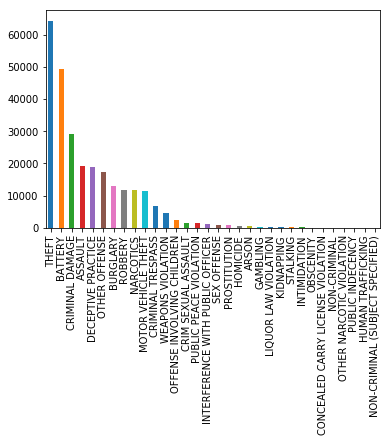

In [14]:
%matplotlib inline
crime_17_type_count.plot.bar()

Find the number of each crime type in 2018

In [15]:
crime_18_type_count = crime_18['Primary Type'].value_counts()

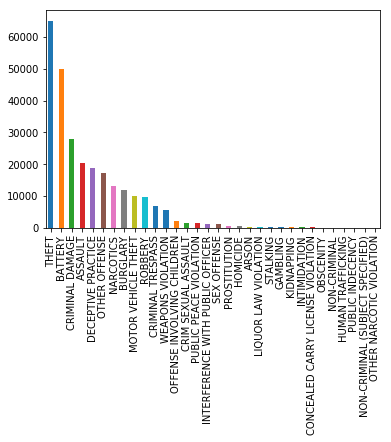

In [16]:
crime_18_type_count.plot.bar()

Difference in each crime type between 2017 and 2018

In [17]:
crime_diff = crime_18_type_count - crime_17_type_count

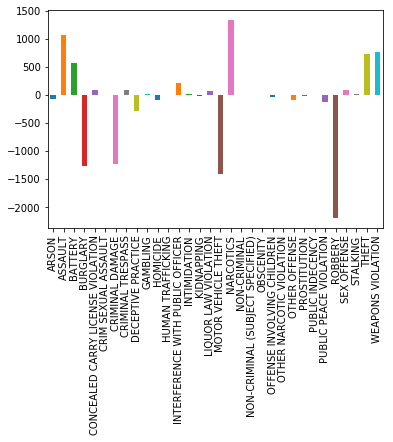

In [18]:
crime_diff.plot.bar()

Find the top 10 community areas in Chicago that suffered from arson, theft, robbery, and assault respectively in 2017

In [19]:
crime_17_type_by_ca = crime_17.groupby(['Community Area', 'Primary Type'])['ID'].count().reset_index()

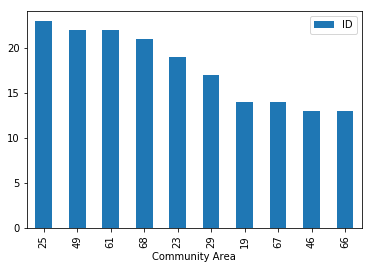

In [20]:
crime_17_type_by_ca[crime_17_type_by_ca['Primary Type'] == 'ARSON'].sort_values(['ID'], ascending=False)[:10].plot.bar('Community Area')

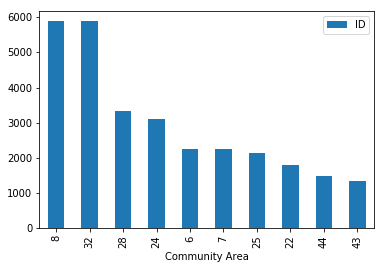

In [21]:
crime_17_type_by_ca[crime_17_type_by_ca['Primary Type'] == 'THEFT'].sort_values(['ID'], ascending=False)[:10].plot.bar('Community Area')

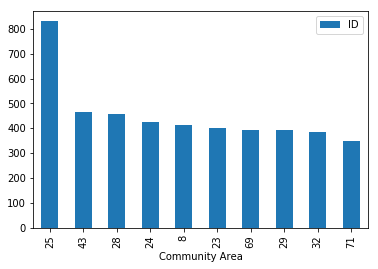

In [22]:
crime_17_type_by_ca[crime_17_type_by_ca['Primary Type'] == 'ROBBERY'].sort_values(['ID'], ascending=False)[:10].plot.bar('Community Area')

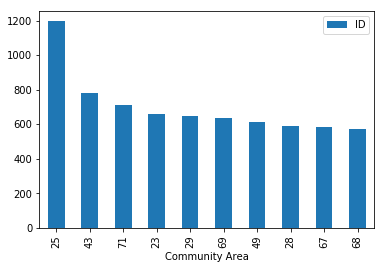

In [23]:
crime_17_type_by_ca[crime_17_type_by_ca['Primary Type'] == 'ASSAULT'].sort_values(['ID'], ascending=False)[:10].plot.bar('Community Area')

Find the top 10 community areas in Chicago that suffered from arson, theft, robbery, and assault respectively in 2018

In [24]:
crime_18_type_by_ca = crime_18.groupby(['Community Area', 'Primary Type'])['ID'].count().reset_index()

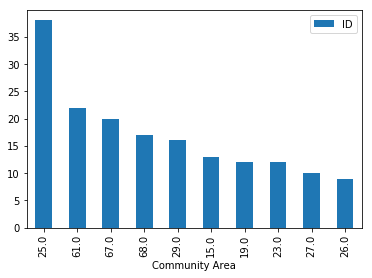

In [25]:
crime_18_type_by_ca[crime_18_type_by_ca['Primary Type'] == 'ARSON'].sort_values(['ID'], ascending=False)[:10].plot.bar('Community Area')

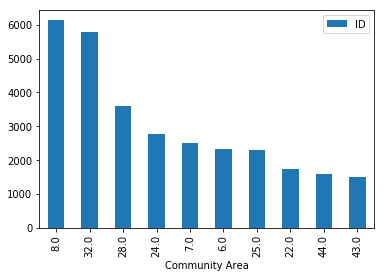

In [26]:
crime_18_type_by_ca[crime_18_type_by_ca['Primary Type'] == 'THEFT'].sort_values(['ID'], ascending=False)[:10].plot.bar('Community Area')

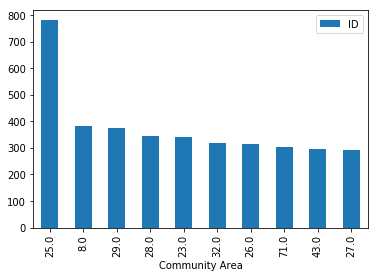

In [27]:
crime_18_type_by_ca[crime_18_type_by_ca['Primary Type'] == 'ROBBERY'].sort_values(['ID'], ascending=False)[:10].plot.bar('Community Area')

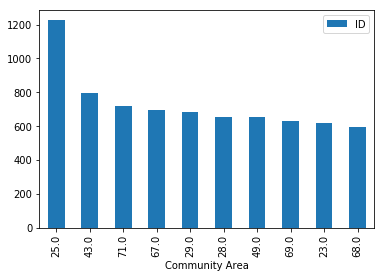

In [28]:
crime_18_type_by_ca[crime_18_type_by_ca['Primary Type'] == 'ASSAULT'].sort_values(['ID'], ascending=False)[:10].plot.bar('Community Area')

Find the distribution of crime types in Hyde Park (Community Area No.41) in 2017 and 2018

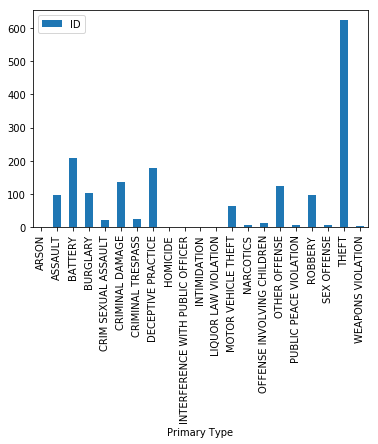

In [29]:
crime_17_type_by_ca[crime_17_type_by_ca['Community Area'] == 41][['Primary Type', 'ID']].plot.bar('Primary Type')

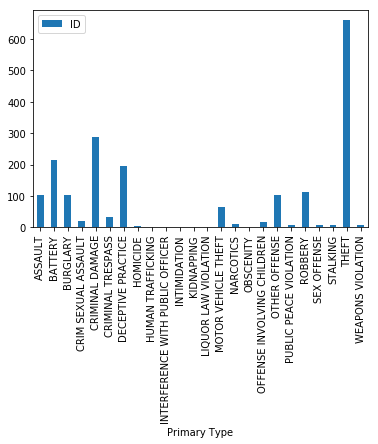

In [30]:
crime_18_type_by_ca[crime_18_type_by_ca['Community Area'] == 41][['Primary Type', 'ID']].plot.bar('Primary Type')

Find the distribution of crime types in Washington Park (Community Area No.40) in 2017 and 2018

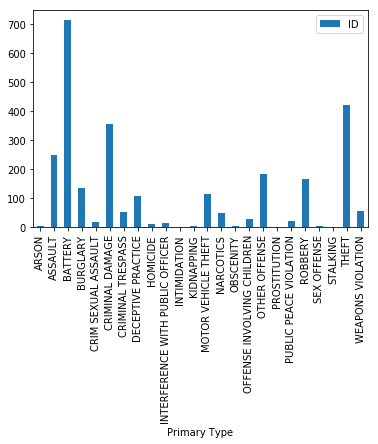

In [31]:
crime_17_type_by_ca[crime_17_type_by_ca['Community Area'] == 40][['Primary Type', 'ID']].plot.bar('Primary Type')

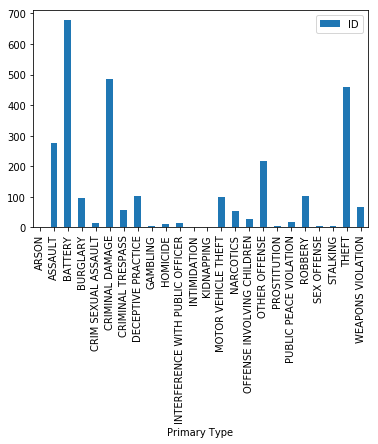

In [32]:
crime_18_type_by_ca[crime_18_type_by_ca['Community Area'] == 40][['Primary Type', 'ID']].plot.bar('Primary Type')

## Problem 2: Data Augmentation and APIs

In this problem, I will use census API to combine the crime data with data on male population, white population, median income, and number of college degree holders in each neighborhood. I use American Community Survey 5-year estimates data, and the geographic unit in my analysis is the officially-designated community area in the City of Chicago
<br>
<br>
Concerning the fact that many entries of crime data have missing value on the geographic coordinate, while very few entries have missing values on the community area, using community area as the geographic unit will be much more accurate and efficient. However, community area information is unavailable in the ACS data, and the most basic geographic level in ACS data is census tract. In order to match census tract number in ACS data to officially-designated community area number, I found the document "2010 Tract to Community Area Equivalency File.csv" on a third-party web blog <http://robparal.blogspot.com/2012/04/census-tracts-in-chicago-community.html>
<br>
<br>
After data augmentation, I conduct a set of linear regressions of the number of certain crime in each neighborhood on the neighborhood's male population, white population, median income, and number of college degree holders

Access the census data of all census tracts in the state of Illinois and Cook County (Cook County FIPS Code: 031)

In [33]:
c = Census("15753347e41c32f4d6ba44471df9745032bc621e")

In [34]:
male_pop =c.acs5.state_county_tract("B01001_002E", states.IL.fips, '031',Census.ALL)

In [35]:
white_alone = c.acs5.state_county_tract("B01001A_001E", states.IL.fips, '031', Census.ALL)

In [36]:
median_income = c.acs5.state_county_tract("B06011_001E", states.IL.fips, '031', Census.ALL)

In [37]:
college_degree = c.acs5.state_county_tract("B06009_011E", states.IL.fips, '031', Census.ALL)

In [38]:
male_pop_df = pd.DataFrame(columns=['Male pop', 'Tract'])
for row in male_pop:
    male_pop_df = male_pop_df.append({'Male pop':row['B01001_002E'], 'Tract': row['tract']}, ignore_index=True)

In [39]:
white_alone_df = pd.DataFrame(columns=['White pop', 'Tract'])
for row in white_alone:
    white_alone_df = white_alone_df.append({'White pop':row['B01001A_001E'], 'Tract': row['tract']}, ignore_index=True)

In [40]:
median_income_df = pd.DataFrame(columns=['Median income', 'Tract'])
for row in median_income:
    median_income_df = median_income_df.append({'Median income':row['B06011_001E'], 'Tract': row['tract']}, ignore_index=True)

In [41]:
college_df = pd.DataFrame(columns=['College degree holder', 'Tract'])
for row in college_degree:
    college_df = college_df.append({'College degree holder':row["B06009_011E"], 'Tract': row['tract']}, ignore_index=True)

Import the Tract to Community Area Equivalency File

In [42]:
match = pd.read_csv('2010 Tract to Community Area Equivalency File.csv')

In [43]:
match['TRACT'] = match['TRACT'].astype('str')

In [44]:
match['TRACT'] = match['TRACT'].apply(lambda x: x.zfill(6))

Match the tract number in ACS data to corresponding community area number

In [45]:
match_dictionary = {}
for index, row in match.iterrows():
    match_dictionary[row['TRACT']] = row['CHGOCA']

In [46]:
def find_neighborhood(item):
    '''
    Convert tract number to community area number
    
    Input: item(str)
    Output: neighborhood(str)
    '''
    
    if item in match_dictionary.keys():
        neighborhood = match_dictionary[item]
    else:
        neighborhood = 'Not in Chicago'
        
    return neighborhood

Drop the ACS data entries that do not match community areas in Chicago (Other cities/townships in Cook County)

In [47]:
male_pop_df['Community Area'] = male_pop_df['Tract'].apply(lambda x: find_neighborhood(x))
for index, row in male_pop_df.iterrows():
    if row['Community Area'] == 'Not in Chicago':
        male_pop_df.drop(index, inplace=True)
        
white_alone_df['Community Area'] = white_alone_df['Tract'].apply(lambda x: find_neighborhood(x))
for index, row in white_alone_df.iterrows():
    if row['Community Area'] == 'Not in Chicago':
        white_alone_df.drop(index, inplace=True)
        
median_income_df['Community Area'] = median_income_df['Tract'].apply(lambda x: find_neighborhood(x))
for index, row in median_income_df.iterrows():
    if row['Community Area'] == 'Not in Chicago':
        median_income_df.drop(index, inplace=True)
        
college_df['Community Area'] = college_df['Tract'].apply(lambda x: find_neighborhood(x))
for index, row in college_df.iterrows():
    if row['Community Area'] == 'Not in Chicago':
        college_df.drop(index, inplace=True)

Aggregate the ACS data to the level of community area

In [48]:
male_pop_by_neighborhood = male_pop_df.groupby('Community Area').sum().reset_index()

In [49]:
white_pop_by_neighborhood = white_alone_df.groupby('Community Area').sum().reset_index()

In [50]:
median_inc_by_neighborhood = median_income_df.groupby('Community Area').median().reset_index()

In [51]:
college_degree_by_neighborhood = college_df.groupby('Community Area').sum().reset_index()

Merge all community-area-level ACS data to one dataframe

In [52]:
cas = pd.merge(male_pop_by_neighborhood, white_pop_by_neighborhood, on='Community Area', how='outer')
cas = pd.merge(cas, median_inc_by_neighborhood, on='Community Area', how='outer')
cas = pd.merge(cas, college_degree_by_neighborhood, on='Community Area', how='outer')

Merge the community-area-level ACS data with crime data in 2017, and 2018, respectively

In [53]:
merged_17 = pd.merge(crime_17, cas, on='Community Area', how='outer')

In [54]:
merged_18 = pd.merge(crime_18, cas, on='Community Area', how='outer')

In [55]:
merged_17 = merged_17.dropna(subset=['Male pop', 'White pop', 'Median income', 'College degree holder'])
merged_18 = merged_18.dropna(subset=['Male pop', 'White pop', 'Median income', 'College degree holder'])

Find the type of community area that have reports of battery, using linear regression model

In [56]:
battery_count_17 = merged_17[merged_17['Primary Type'] == 'BATTERY'].groupby('Community Area')['ID'].count()
battery_count_17 = battery_count_17.reset_index()
battery_model_17 = pd.merge(battery_count_17, cas, on='Community Area', how='outer')

In [57]:
X_cols = ['Male pop', 'White pop', 'Median income', 'College degree holder']
Y_col = ['ID']
model_1 = sm.OLS(battery_model_17[Y_col], battery_model_17[X_cols])
result_1 = model_1.fit()

According to the following summary of the OLS result, community areas with more male populations and less white populations tend to have more reports of "Battery"

In [58]:
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ID   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     148.8
Date:                Mon, 08 Apr 2019   Prob (F-statistic):           2.69e-34
Time:                        21:07:08   Log-Likelihood:                -545.41
No. Observations:                  77   AIC:                             1099.
Df Residuals:                      73   BIC:                             1108.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Male pop                  0.0738      0.004     17.923      0.000       0.066       0.082
White pop                -0.0510      0.004    -13.146      0.000      -0.059      -0.043
Median income            -0.0007      0.002     -0.329      0.743      -0.005       0.004
College degree holder     0.1027      0.026      4.017      0.000       0.052       0.154
==============================================================================
Omnibus:                        3.517   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                2.742
Skew:                           0.421   Prob(JB):                        0.254
Kurtosis:                       3.380   Cond. No.                         32.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Find the type of community area that have reports of homicide, using linear regression model

In [59]:
hom_count_17 = merged_17[merged_17['Primary Type'] == 'HOMICIDE'].groupby('Community Area')['ID'].count()
hom_count_17 = hom_count_17.reset_index()
hom_model_17 = pd.merge(hom_count_17, cas, on='Community Area', how='outer')
hom_model_17 = hom_model_17.dropna()
X_cols = ['Male pop', 'White pop', 'Median income', 'College degree holder']
Y_col = ['ID']
model_2 = sm.OLS(hom_model_17[Y_col], hom_model_17[X_cols])
result_2 = model_2.fit()

According to the following summary of the OLS result, community areas with more male populations and less white populations tend to have more reports of "Homicide"

In [60]:
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ID   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     73.08
Date:                Mon, 08 Apr 2019   Prob (F-statistic):           9.06e-23
Time:                        21:07:15   Log-Likelihood:                -222.31
No. Observations:                  66   AIC:                             452.6
Df Residuals:                      62   BIC:                             461.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Male pop                  0.0015      0.000     13.341      0.000       0.001       0.002
White pop                -0.0011   9.85e-05    -11.444      0.000      -0.001      -0.001
Median income         -3.316e-05   7.36e-05     -0.451      0.654      -0.000       0.000
College degree holder     0.0015      0.001      2.251      0.028       0.000       0.003
==============================================================================
Omnibus:                        9.398   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.518
Skew:                           0.716   Prob(JB):                      0.00858
Kurtosis:                       4.188   Cond. No.                         30.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the same models using the 2018 data, it does not change over time

In [61]:
battery_count_18 = merged_18[merged_18['Primary Type'] == 'BATTERY'].groupby('Community Area')['ID'].count()
battery_count_18 = battery_count_18.reset_index()
battery_model_18 = pd.merge(battery_count_18, cas, on='Community Area', how='outer')
battery_model_18 = battery_model_18.dropna()
model_3 = sm.OLS(battery_model_18[Y_col], battery_model_18[X_cols])
result_3 = model_3.fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ID   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     150.7
Date:                Mon, 08 Apr 2019   Prob (F-statistic):           1.79e-34
Time:                        21:07:23   Log-Likelihood:                -545.51
No. Observations:                  77   AIC:                             1099.
Df Residuals:                      73   BIC:                             1108.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Male pop                  0.0736      0.004     17.853      0.000       0.065       0.082
White pop                -0.0505      0.004    -12.999      0.000      -0.058      -0.043
Median income            -0.0007      0.002     -0.321      0.749      -0.005       0.004
College degree holder     0.1039      0.026      4.058      0.000       0.053       0.155
==============================================================================
Omnibus:                        5.208   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                4.389
Skew:                           0.514   Prob(JB):                        0.111
Kurtosis:                       3.558   Cond. No.                         32.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
hom_count_18 = merged_18[merged_18['Primary Type'] == 'HOMICIDE'].groupby('Community Area')['ID'].count()
hom_count_18 = hom_count_18.reset_index()
hom_model_18 = pd.merge(hom_count_18, cas, on='Community Area', how='outer')
hom_model_18 = hom_model_18.dropna()
X_cols = ['Male pop', 'White pop', 'Median income', 'College degree holder']
Y_col = ['ID']
model_4 = sm.OLS(hom_model_18[Y_col], hom_model_18[X_cols])
result_4 = model_4.fit()
result_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ID   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     58.55
Date:                Mon, 08 Apr 2019   Prob (F-statistic):           1.55e-20
Time:                        21:07:28   Log-Likelihood:                -218.06
No. Observations:                  67   AIC:                             444.1
Df Residuals:                      63   BIC:                             452.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Male pop                  0.0012   9.25e-05     12.518      0.000       0.001       0.001
White pop                -0.0009   9.02e-05     -9.597      0.000      -0.001      -0.001
Median income          1.049e-05   5.14e-05      0.204      0.839   -9.22e-05       0.000
College degree holder     0.0009      0.001      1.616      0.111      -0.000       0.002
==============================================================================
Omnibus:                       13.185   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.622
Skew:                           0.927   Prob(JB):                     0.000668
Kurtosis:                       4.342   Cond. No.                         31.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Find the type of community area that have reports of 'Deceptive Practice', using linear regression model
<br>
According to the following OLS model, community areas that have more college degree holders tend to have more reports on "Deceptive Practice"

In [63]:
dec_count_18 = merged_18[merged_18['Primary Type'] == 'DECEPTIVE PRACTICE'].groupby('Community Area')['ID'].count()
dec_count_18 = dec_count_18.reset_index()
dec_model_18 = pd.merge(dec_count_18, cas, on='Community Area', how='outer')
dec_model_18 = dec_model_18.dropna()
X_cols = ['Male pop', 'White pop', 'Median income', 'College degree holder']
Y_col = ['ID']
model_5 = sm.OLS(dec_model_18[Y_col], dec_model_18[X_cols])
result_5 = model_5.fit()
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ID   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     35.43
Date:                Mon, 08 Apr 2019   Prob (F-statistic):           1.98e-16
Time:                        21:07:31   Log-Likelihood:                -527.76
No. Observations:                  77   AIC:                             1064.
Df Residuals:                      73   BIC:                             1073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Male pop                  0.0086      0.003      2.619      0.011       0.002       0.015
White pop                -0.0079      0.003     -2.573      0.012      -0.014      -0.002
Median income             0.0012      0.002      0.660      0.511      -0.002       0.005
College degree holder     0.0825      0.020      4.056      0.000       0.042       0.123
==============================================================================
Omnibus:                      106.621   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1963.489
Skew:                           4.483   Prob(JB):                         0.00
Kurtosis:                      26.057   Cond. No.                         32.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Find the type of community area that have reports of 'Sex Offense', using linear regression model
<br>
According to the following OLS model, community areas that have more male population and less white population tend to have more reports on "Sex Offense"

In [64]:
sex_count_18 = merged_18[merged_18['Primary Type'] == 'SEX OFFENSE'].groupby('Community Area')['ID'].count()
sex_count_18 = sex_count_18.reset_index()
sex_model_18 = pd.merge(sex_count_18, cas, on='Community Area', how='outer')
sex_model_18 = sex_model_18.dropna()
X_cols = ['Male pop', 'White pop', 'Median income', 'College degree holder']
Y_col = ['ID']
model_6 = sm.OLS(sex_model_18[Y_col], sex_model_18[X_cols])
result_6 = model_6.fit()
result_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ID   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     125.6
Date:                Mon, 08 Apr 2019   Prob (F-statistic):           2.02e-31
Time:                        21:07:36   Log-Likelihood:                -249.09
No. Observations:                  75   AIC:                             506.2
Df Residuals:                      71   BIC:                             515.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Male pop                  0.0011   9.67e-05     11.651      0.000       0.001       0.001
White pop                -0.0005   9.03e-05     -5.825      0.000      -0.001      -0.000
Median income         -3.782e-05    5.3e-05     -0.713      0.478      -0.000    6.79e-05
College degree holder     0.0021      0.001      3.447      0.001       0.001       0.003
==============================================================================
Omnibus:                       28.793   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.558
Skew:                           1.366   Prob(JB):                     5.23e-13
Kurtosis:                       6.261   Cond. No.                         32.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Problem 3: Analysis and Communication

1. Describe how crime changed from 2017 to 2018

The total number of crime decreased by 1826 cases

In [65]:
merged_18.shape[0] - merged_17.shape[0]

-1826

The top 10 crime types in 2017 are following:

In [66]:
crime_17_type_count[:10]

THEFT                  64346
BATTERY                49214
CRIMINAL DAMAGE        29042
ASSAULT                19303
DECEPTIVE PRACTICE     19028
OTHER OFFENSE          17227
BURGLARY               13001
ROBBERY                11877
NARCOTICS              11658
MOTOR VEHICLE THEFT    11406
Name: Primary Type, dtype: int64

The top 10 crime types in 2018 are following:

In [67]:
crime_18_type_count[:10]

THEFT                  65082
BATTERY                49782
CRIMINAL DAMAGE        27806
ASSAULT                20377
DECEPTIVE PRACTICE     18733
OTHER OFFENSE          17130
NARCOTICS              12988
BURGLARY               11730
MOTOR VEHICLE THEFT     9988
ROBBERY                 9683
Name: Primary Type, dtype: int64

The number of following 5 crime types decreased the most from 2017 to 2018

In [68]:
crime_diff.sort_values(ascending=True)[:5]

ROBBERY               -2194
MOTOR VEHICLE THEFT   -1418
BURGLARY              -1271
CRIMINAL DAMAGE       -1236
DECEPTIVE PRACTICE     -295
Name: Primary Type, dtype: int64

The number of following 5 crime types increased the most from 2017 to 2018

In [69]:
crime_diff.sort_values(ascending=False)[:5]

NARCOTICS            1330
ASSAULT              1074
WEAPONS VIOLATION     764
THEFT                 736
BATTERY               568
Name: Primary Type, dtype: int64

2. Facts-check on the candidate's speech

Create the month column that extracts the month of every single entry

In [70]:
merged_17['Month'] = merged_17.apply(lambda row: datetime.strptime(row['Date'], '%m/%d/%Y %H:%M:%S %p').month, axis=1)

In [71]:
merged_18['Month'] = merged_18.apply(lambda row: datetime.strptime(row['Date'], '%m/%d/%Y %H:%M:%S %p').month, axis=1)

Find the change of robberies in ward 43 in two time periods, which is not 21%

In [72]:
robbery_17 = merged_17[(merged_17['Primary Type'] == 'ROBBERY') & (merged_17['Ward'] == 43)]
robbery_cnt_17 = robbery_17[robbery_17['Month'] == 7]
robbery_18 = merged_18[(merged_18['Primary Type'] == 'ROBBERY') & (merged_18['Ward'] == 43)]
robbery_cnt_18 = robbery_18[robbery_18['Month'] == 7]
(robbery_cnt_18.shape[0] - robbery_cnt_17.shape[0])/robbery_cnt_17.shape[0]

-0.25

Find the change of batteries in ward 43 in two time periods, which is not 136%

In [73]:
bat_17 = merged_17[(merged_17['Primary Type'] == 'BATTERY') & (merged_17['Ward'] == 43)]
bat_cnt_17 = bat_17[bat_17['Month'] == 7]
bat_18 = merged_18[(merged_18['Primary Type'] == 'BATTERY') & (merged_18['Ward'] == 43)]
bat_cnt_18 = bat_18[bat_18['Month'] == 7]
(bat_cnt_18.shape[0] - bat_cnt_17.shape[0])/bat_cnt_17.shape[0]

-0.1276595744680851

Find the change of burglaries in ward 43 in two time periods, which is not 50%

In [74]:
burg_17 = merged_17[(merged_17['Primary Type'] == 'BURGLARY') & (merged_17['Ward'] == 43)]
burg_cnt_17 = burg_17[burg_17['Month'] == 7]
burg_18 = merged_18[(merged_18['Primary Type'] == 'BURGLARY') & (merged_18['Ward'] == 43)]
burg_cnt_18 = burg_18[burg_18['Month'] == 7]
(burg_cnt_18.shape[0] - burg_cnt_17.shape[0])/burg_cnt_17.shape[0]

0.0

Find the change of motor vehicle theft in ward 43 in two time periods, which is not 41%

In [75]:
mot_17 = merged_17[(merged_17['Primary Type'] == 'MOTOR VEHICLE THEFT') & (merged_17['Ward'] == 43)]
mot_cnt_17 = mot_17[mot_17['Month'] == 7]
mot_18 = merged_18[(merged_18['Primary Type'] == 'MOTOR VEHICLE THEFT') & (merged_18['Ward'] == 43)]
mot_cnt_18 = mot_18[mot_18['Month'] == 7]
(mot_cnt_18.shape[0] - mot_cnt_17.shape[0])/mot_cnt_17.shape[0]

0.2727272727272727

Find the change of total crime in ward 43 in two time periods, which is about 13.4% increase

In [76]:
total_17 = merged_17[(merged_17['Month'] == 7) & (merged_17['Ward'] == 43)]
total_18 = merged_18[(merged_18['Month'] == 7) & (merged_18['Ward'] == 43)]
(total_18.shape[0] - total_17.shape[0])/total_17.shape[0]

0.13404825737265416

Find the change of total crime in ward 43 in two Year-to-Date periods, which is about 10% increase

In [77]:
year_to_date_17 = merged_17[(merged_17['Month'].between(1, 7, inclusive=True)) & (merged_17['Ward'] == 43)]
year_to_date_18 = merged_18[(merged_18['Month'].between(1, 7, inclusive=True)) & (merged_18['Ward'] == 43)]
(year_to_date_18.shape[0] - year_to_date_17.shape[0])/year_to_date_17.shape[0]

0.10040522287257991

The statistics on the change in Robberies, Batteries, Burglaries, and Motor Vehicle Theft are incorrect
<br>
The statistics on the change in overall crime numbers are close to the truth
<br>
The claims on the change of Robberies, Batteries, Burglaries, and Motor Vehicle Theft could be misleading, as they do not reflect the real change at all. The overall claim could also be misleading, as we can see that the overall number of crime has decreased slightly from 2017 to 2018

Here are my five key findings:
<br>
<br>
I. From 2017 to 2018, we saw an increase in reports on narcotics, assault, and weapon violation.
<br>
II. We should focus on advocacy of anti-sex offense, especially in areas populated by minorities.
<br>
III. We should focus on advocacy of anti-scam in areas populated by people with college degrees
<br>
IV. Theft is still the biggest problem among all crime types
<br>
V. Overall, the number of crime decreased slightly from 2017 to 2018

Caveats:
<br>
<br>
I. It is conducted on community-area level; the modelling part could be more accurate if it is conducted on census-tract level.
<br>
II. The studies would deliver more information if we further break down the racial composition variable (instead of white vs. non-white)

## Problem 3. Basic Statistics

Question A.

In [78]:
s_michigan_17 = merged_17[merged_17['Block'] == '021XX S MICHIGAN AVE']

In [79]:
s_michigan_18 = merged_18[merged_18['Block'] == '021XX S MICHIGAN AVE']

In [80]:
s_michigan_17['Primary Type'].value_counts()

BATTERY                              12
OTHER OFFENSE                         6
ASSAULT                               4
THEFT                                 4
CRIMINAL DAMAGE                       3
ROBBERY                               2
BURGLARY                              1
MOTOR VEHICLE THEFT                   1
CRIMINAL TRESPASS                     1
DECEPTIVE PRACTICE                    1
HOMICIDE                              0
HUMAN TRAFFICKING                     0
WEAPONS VIOLATION                     0
GAMBLING                              0
INTIMIDATION                          0
CRIM SEXUAL ASSAULT                   0
CONCEALED CARRY LICENSE VIOLATION     0
INTERFERENCE WITH PUBLIC OFFICER      0
LIQUOR LAW VIOLATION                  0
KIDNAPPING                            0
NARCOTICS                             0
NON-CRIMINAL                          0
NON-CRIMINAL (SUBJECT SPECIFIED)      0
OBSCENITY                             0
OFFENSE INVOLVING CHILDREN            0


In [81]:
s_michigan_18['Primary Type'].value_counts()

OTHER OFFENSE                        7
DECEPTIVE PRACTICE                   5
BATTERY                              4
CRIMINAL DAMAGE                      3
ASSAULT                              2
THEFT                                2
PUBLIC PEACE VIOLATION               1
MOTOR VEHICLE THEFT                  1
HUMAN TRAFFICKING                    0
HOMICIDE                             0
GAMBLING                             0
WEAPONS VIOLATION                    0
CRIMINAL TRESPASS                    0
INTIMIDATION                         0
CRIM SEXUAL ASSAULT                  0
CONCEALED CARRY LICENSE VIOLATION    0
BURGLARY                             0
INTERFERENCE WITH PUBLIC OFFICER     0
LIQUOR LAW VIOLATION                 0
KIDNAPPING                           0
NARCOTICS                            0
NON-CRIMINAL                         0
NON-CRIMINAL (SUBJECT SPECIFIED)     0
OBSCENITY                            0
OFFENSE INVOLVING CHILDREN           0
OTHER NARCOTIC VIOLATION 

In [82]:
total_counts = s_michigan_17['Primary Type'].value_counts() + s_michigan_18['Primary Type'].value_counts()

In [83]:
sum(total_counts)

60

In [84]:
total_counts[total_counts > 0]

ASSAULT                    6
BATTERY                   16
BURGLARY                   1
CRIMINAL DAMAGE            6
CRIMINAL TRESPASS          1
DECEPTIVE PRACTICE         6
MOTOR VEHICLE THEFT        2
OTHER OFFENSE             13
PUBLIC PEACE VIOLATION     1
ROBBERY                    2
THEFT                      6
Name: Primary Type, dtype: int64

The Probability for Battery is 26.67%

In [85]:
p_battery = total_counts['BATTERY']/sum(total_counts)
p_battery

0.26666666666666666

The Probability for Other Offense is 21.67%

In [86]:
p_other_offense = total_counts['OTHER OFFENSE']/sum(total_counts)
p_other_offense

0.21666666666666667

The Probability for Assault, as well as for Criminal Damage, Deceptive Practice, and Theft, respectively, is 10%

In [87]:
p_assault = total_counts['ASSAULT']/sum(total_counts)
p_assault

0.1

The Probability for Robbery, as well as for Motor Vehicle Theft, is 3%

In [88]:
p_robbery = total_counts['ROBBERY']/sum(total_counts)
p_robbery

0.03333333333333333

The Probability for Burglary, as well as for Criminal Trepass and Public Peace Violation respectively, is 1.67%

In [89]:
p_burg = total_counts['BURGLARY']/sum(total_counts)
p_burg

0.016666666666666666

The Probability for the rest is 0

Question B.

In [90]:
theft_17 = merged_17[merged_17['Primary Type'] == 'THEFT']

In [91]:
theft_18 = merged_18[merged_18['Primary Type'] == 'THEFT']

In [92]:
theft = pd.concat([theft_17, theft_18], ignore_index=True)

In [93]:
garfield_no = theft[(theft['Community Area'] == 26) | (theft['Community Area'] == 27)]

In [94]:
garfield_no.shape[0]/theft.shape[0]

0.01926940074790617

In [95]:
uptown_no = theft[theft['Community Area'] == 3]
uptown_no.shape[0]/theft.shape[0]

0.015097196897116543

It is more likely to be from Garfield than from Uptown by 0.417%

In [96]:
(garfield_no.shape[0]/theft.shape[0]) - (uptown_no.shape[0]/theft.shape[0])

0.004172203850789627

Question C.

According to the theorem of the probability on conditional event:

P(A|B) = P(A intersection B)/P(B)

In [97]:
p_bat_con_garfield = ((600/1000) * (100/600))/((100+160)/1000)

In [98]:
p_bat_con_uptown = ((400/1000) * (160/400))/((100+160)/1000)

It is more likely to be from Uptown than from Garfield by 23.08%

In [99]:
p_bat_con_uptown - p_bat_con_garfield

0.23076923076923095